<a href="https://colab.research.google.com/github/astrrr/Image-Processing-Lab/blob/main/Activity10_imageporcessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [36]:
import numpy as np
import cv2
from matplotlib import pyplot as plt
import keras
from keras.preprocessing import image
from keras.layers import Dense,GlobalAveragePooling2D
from tensorflow.keras.applications.mobilenet import MobileNet
from keras.applications.mobilenet import preprocess_input
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# 10.1 Load base model,  add new layers

In [37]:
#Load base model
base_model=MobileNet(weights='imagenet',include_top=False)

In [38]:
# Add new layers
x=base_model.output
x=GlobalAveragePooling2D()(x)
x=Dense(1024,activation='relu')(x) #we add dense layers so that the model can learn more complex functions and classify for better results.
x=Dense(1024,activation='relu')(x) #dense layer 2
x=Dense(512,activation='relu')(x) #dense layer 3
preds=Dense(3,activation='softmax')(x)

In [39]:
# Assign transfer base model + new layers to model
model = keras.Model(inputs=base_model.input,outputs=preds)
model.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, None, None, 3)]   0         
                                                                 
 conv1 (Conv2D)              (None, None, None, 32)    864       
                                                                 
 conv1_bn (BatchNormalizatio  (None, None, None, 32)   128       
 n)                                                              
                                                                 
 conv1_relu (ReLU)           (None, None, None, 32)    0         
                                                                 
 conv_dw_1 (DepthwiseConv2D)  (None, None, None, 32)   288       
                                                                 
 conv_dw_1_bn (BatchNormaliz  (None, None, None, 32)   128       
 ation)                                                    

In [40]:
# Assign transfer base model + new layers to model
model2 = keras.Model(inputs=base_model.input,outputs=preds)
model2.summary()

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, None, None, 3)]   0         
                                                                 
 conv1 (Conv2D)              (None, None, None, 32)    864       
                                                                 
 conv1_bn (BatchNormalizatio  (None, None, None, 32)   128       
 n)                                                              
                                                                 
 conv1_relu (ReLU)           (None, None, None, 32)    0         
                                                                 
 conv_dw_1 (DepthwiseConv2D)  (None, None, None, 32)   288       
                                                                 
 conv_dw_1_bn (BatchNormaliz  (None, None, None, 32)   128       
 ation)                                                    

In [41]:
# Assign Trainable layers and freeze layer -> ลองเปลี่ยน ช่วง layer ในการ trainable True/False 3 ค่า เพื่อดูความแตกต่างของผลลัพธ์ที่ได้
for layer in model.layers[:40]:
  layer.trainable=False
for layer in model.layers[40:]:
  layer.trainable=True

for layer in model2.layers[:40]:
  layer.trainable=False
for layer in model2.layers[40:]:
  layer.trainable=True

# 10.2 Model Training and validation

* 10.2.1 Create ImageDataGenerator (Train, Validation)

In [42]:
#Create DataGeneartor Object
datagen=ImageDataGenerator( rescale=1./255,
                            rotation_range=30, zoom_range=0.5,
                            width_shift_range=0.2, height_shift_range=0.2,
                            shear_range=0.15, horizontal_flip=True,
                            fill_mode="nearest")

In [43]:
# Create Train Image generator
seed_value = 10
train_generator=datagen.flow_from_directory('/content/drive/MyDrive/img_processing_lab10_data/Ship/Train', # this is where you specify the path to the main data folder
                                              target_size=(224,224),
                                              color_mode='rgb',
                                              batch_size=32,
                                              class_mode='categorical',
                                              seed = seed_value,
                                              shuffle=True)

Found 97 images belonging to 3 classes.


In [44]:
train_generator.class_indices

{'battleship': 0, 'patrol boat': 1, 'submarine': 2}

In [45]:
# Create Validation Image generator
val_generator=datagen.flow_from_directory('/content/drive/MyDrive/img_processing_lab10_data/Ship/Validate', # this is where you specify the path to the main data folder
                                            target_size=(224,224),
                                            color_mode='rgb',
                                            batch_size=16,
                                            class_mode='categorical',
                                            seed = seed_value,
                                            shuffle=True)

Found 69 images belonging to 3 classes.


In [46]:
val_generator.class_indices

{'battle ship': 0, 'patrol ship': 1, 'submarine': 2}

* View Training Images and Validation Images

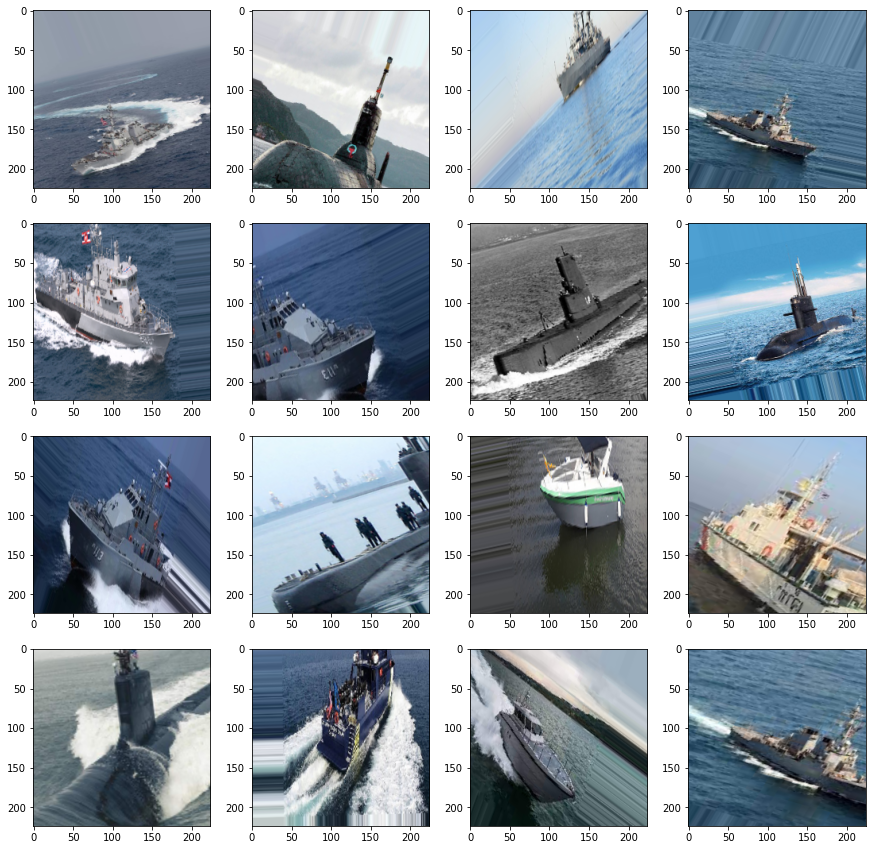

In [47]:
# training

fig = plt.figure(figsize=(15,15))
for _ in range(16):
  img, label = train_generator.next()
  #print(img.shape)   #  (1,224,224,3)
  ax = fig.add_subplot(4,4,_+1)
  ax.imshow(img[0])
plt.show()

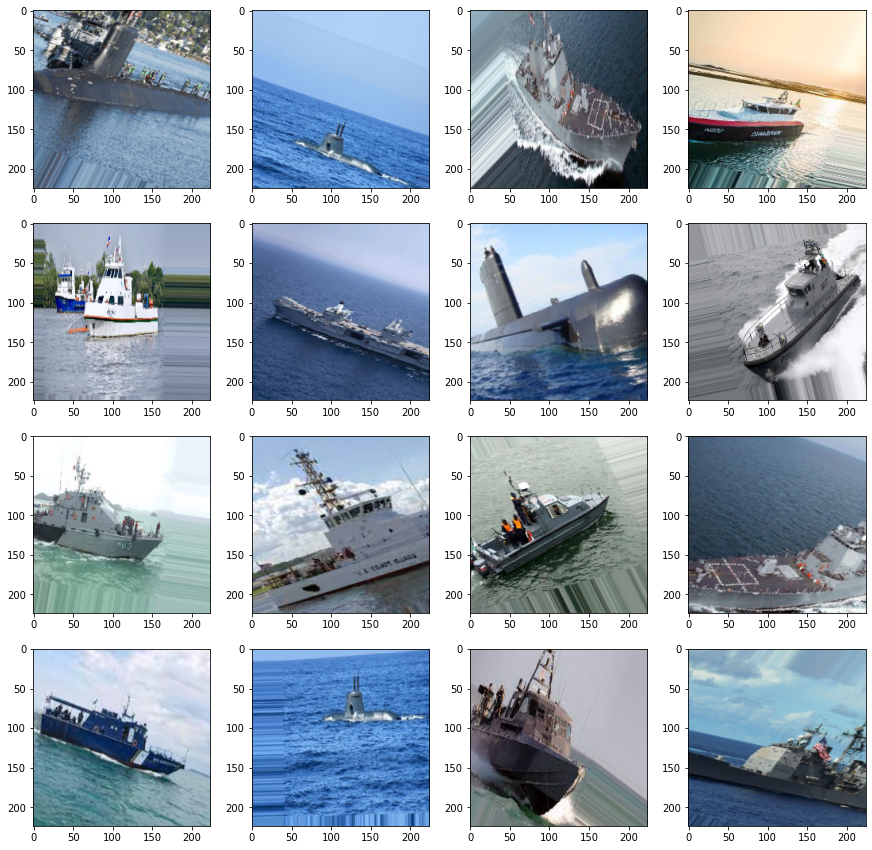

In [48]:
# validate

fig = plt.figure(figsize=(15,15))
for _ in range(16):
  img, label = val_generator.next()
  #print(img.shape)   #  (1,224,224,3)
  ax = fig.add_subplot(4,4,_+1)
  ax.imshow(img[0])
plt.show()

* 10.2.2 Create Optimizer, parameters

In [49]:
# Create Optimizer
model.compile(optimizer='Adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [50]:
# Define training Generator Parameter
EP = 100 # Number of Epoches
step_size_train=train_generator.n//train_generator.batch_size
step_size_val = val_generator.n//val_generator.batch_size
# check step_size_Train = step_size_val -> if not adjust batch_size to make it equal

* 10.2.3 Training, Validation, plot accuracy, loss

In [51]:
history = model.fit_generator(generator=train_generator,
                              steps_per_epoch=step_size_train,
                              validation_data = val_generator,
                              validation_steps = step_size_val,
                              epochs=EP,
                              verbose = 1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  


Epoch 1/100
3/3 [==============================] - 6s 2s/step - loss: 2.5983 - accuracy: 0.3333 - val_loss: 1.3546 - val_accuracy: 0.5156
Epoch 2/100
3/3 [==============================] - 3s 1s/step - loss: 0.9256 - accuracy: 0.5312 - val_loss: 0.5710 - val_accuracy: 0.7656
Epoch 3/100
3/3 [==============================] - 2s 950ms/step - loss: 0.4877 - accuracy: 0.8615 - val_loss: 1.1813 - val_accuracy: 0.6094
Epoch 4/100
3/3 [==============================] - 3s 1s/step - loss: 0.3724 - accuracy: 0.8542 - val_loss: 3.3356 - val_accuracy: 0.3906
Epoch 5/100
3/3 [==============================] - 3s 1s/step - loss: 0.1323 - accuracy: 0.9688 - val_loss: 2.1795 - val_accuracy: 0.6094
Epoch 6/100
3/3 [==============================] - 3s 1s/step - loss: 0.1615 - accuracy: 0.9271 - val_loss: 1.8913 - val_accuracy: 0.7188
Epoch 7/100
3/3 [==============================] - 3s 957ms/step - loss: 0.0770 - accuracy: 0.9692 - val_loss: 4.9401 - val_accuracy: 0.5469
Epoch 8/100
3/3 [===========

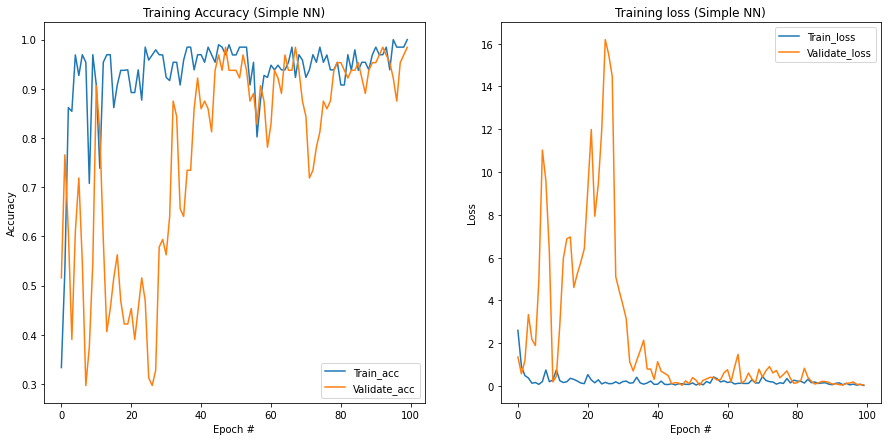

In [52]:
# Performance Visualization
# View Accuracy (Training, Validation)
fig = plt.figure(figsize=(15,7))
fig.add_subplot(121)
plt.plot(history.history["accuracy"], label="Train_acc")
plt.plot(history.history["val_accuracy"], label="Validate_acc")
plt.title('Training Accuracy (Simple NN)')
plt.ylabel('Accuracy')
plt.xlabel('Epoch #')
plt.legend()

fig.add_subplot(122)
plt.plot(history.history["loss"], label="Train_loss")
plt.plot(history.history["val_loss"], label="Validate_loss")
plt.title('Training loss (Simple NN)')
plt.ylabel('Loss')
plt.xlabel('Epoch #')
plt.legend()

plt.show()

* Cat Dog Horse Dataset

In [53]:
CDH_train_generator=datagen.flow_from_directory('/content/drive/MyDrive/img_processing_lab10_data/Cat_Dog_Horse/train', # this is where you specify the path to the main data folder
                                              target_size=(224,224),
                                              color_mode='rgb',
                                              batch_size=32,
                                              class_mode='categorical',
                                              seed = seed_value,
                                              shuffle=True)

Found 175 images belonging to 3 classes.


In [54]:
CDH_val_generator=datagen.flow_from_directory('/content/drive/MyDrive/img_processing_lab10_data/Cat_Dog_Horse/validate', # this is where you specify the path to the main data folder
                                              target_size=(224,224),
                                              color_mode='rgb',
                                              batch_size=16,
                                              class_mode='categorical',
                                              seed = seed_value,
                                              shuffle=True)

Found 31 images belonging to 3 classes.


In [55]:
print(CDH_train_generator.class_indices)
print(CDH_val_generator.class_indices)

{'cats': 0, 'dogs': 1, 'horses': 2}
{'cats': 0, 'dogs': 1, 'horses': 2}


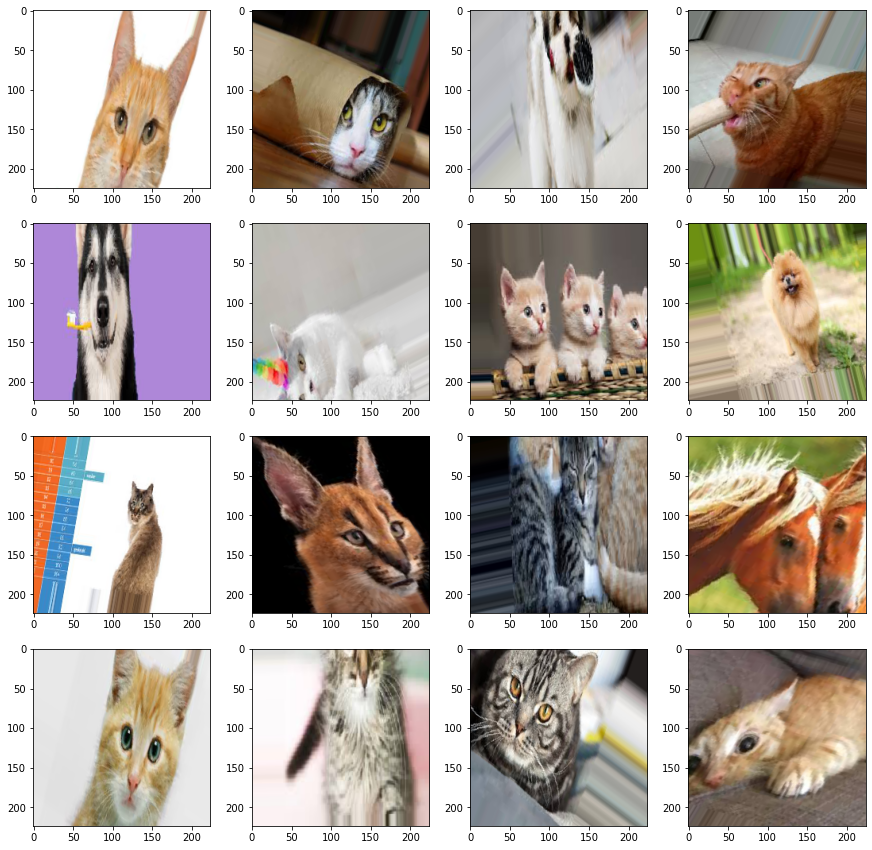

In [56]:
# training

fig = plt.figure(figsize=(15,15))
for _ in range(16):
  img, label = CDH_train_generator.next()
  #print(img.shape)   #  (1,224,224,3)
  ax = fig.add_subplot(4,4,_+1)
  ax.imshow(img[0])
plt.show()

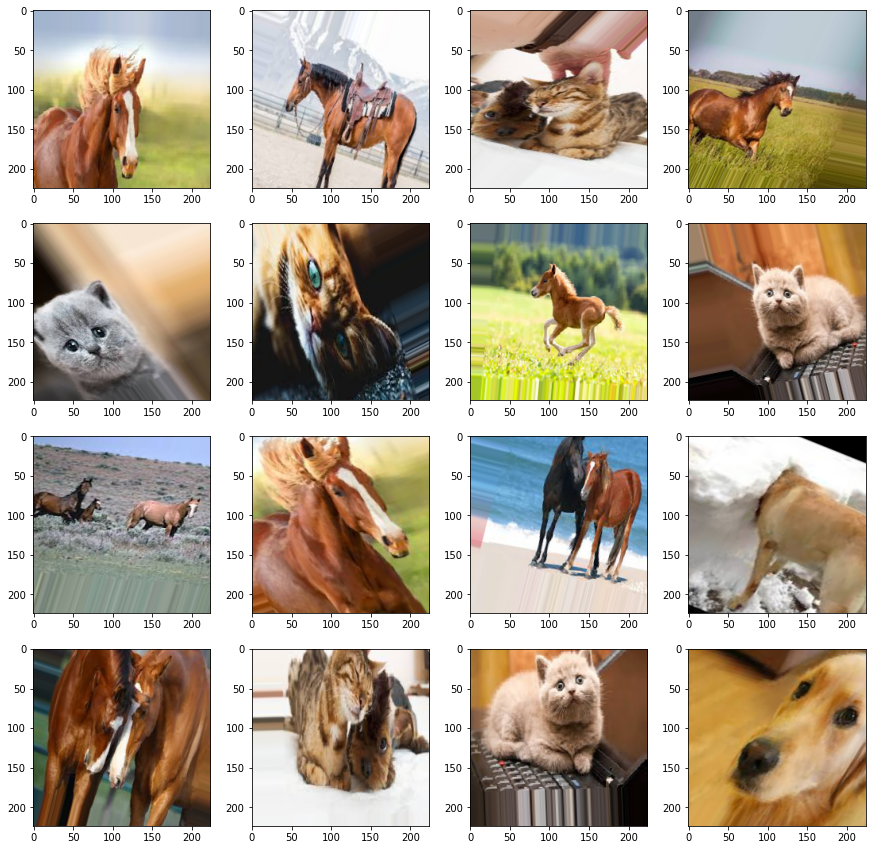

In [57]:
# validate

fig = plt.figure(figsize=(15,15))
for _ in range(16):
  img, label = CDH_val_generator.next()
  #print(img.shape)   #  (1,224,224,3)
  ax = fig.add_subplot(4,4,_+1)
  ax.imshow(img[0])
plt.show()

In [71]:
# Define training Generator Parameter
EP = 20 # Number of Epoches
CDH_step_size_train=CDH_train_generator.n//CDH_train_generator.batch_size
CDH_step_size_val = CDH_val_generator.n//CDH_val_generator.batch_size
# check step_size_Train = step_size_val -> if not adjust batch_size to make it equal

In [72]:
# Create Optimizer
model2.compile(optimizer='Adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [73]:
history_CDH = model2.fit_generator(generator=CDH_train_generator,
                              steps_per_epoch= CDH_step_size_train,
                              validation_data = CDH_val_generator,
                              validation_steps = CDH_step_size_val,
                              epochs=EP,
                              verbose = 1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  


Epoch 1/20
5/5 [==============================] - 5s 610ms/step - loss: 0.0694 - accuracy: 0.9812 - val_loss: 2.4773 - val_accuracy: 0.8750
Epoch 2/20
5/5 [==============================] - 2s 410ms/step - loss: 0.1786 - accuracy: 0.9510 - val_loss: 0.5417 - val_accuracy: 0.8750
Epoch 3/20
5/5 [==============================] - 2s 412ms/step - loss: 0.1668 - accuracy: 0.9510 - val_loss: 2.4819 - val_accuracy: 0.8750
Epoch 4/20
5/5 [==============================] - 2s 420ms/step - loss: 0.1478 - accuracy: 0.9510 - val_loss: 0.4528 - val_accuracy: 0.9375
Epoch 5/20
5/5 [==============================] - 2s 410ms/step - loss: 0.1011 - accuracy: 0.9720 - val_loss: 0.6222 - val_accuracy: 0.8750
Epoch 6/20
5/5 [==============================] - 2s 438ms/step - loss: 0.0701 - accuracy: 0.9720 - val_loss: 0.9281 - val_accuracy: 0.8125
Epoch 7/20
5/5 [==============================] - 2s 445ms/step - loss: 0.0449 - accuracy: 0.9930 - val_loss: 3.2994 - val_accuracy: 0.8750
Epoch 8/20
5/5 [====

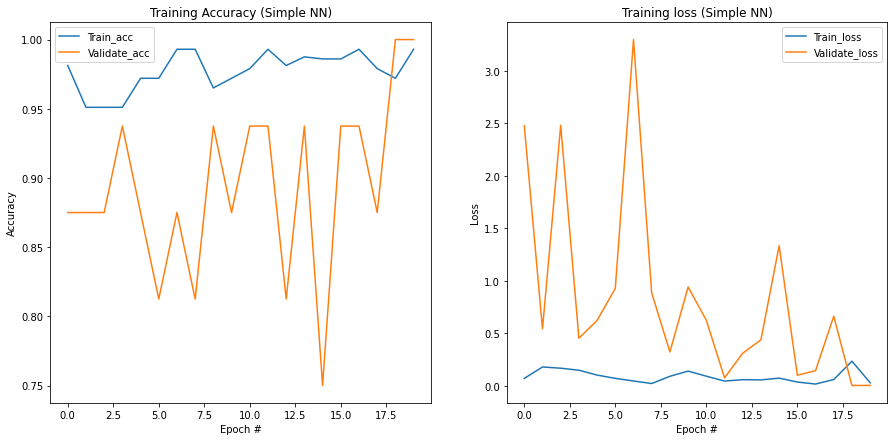

In [74]:
# Performance Visualization
# View Accuracy (Training, Validation)
fig = plt.figure(figsize=(15,7))
fig.add_subplot(121)
plt.plot(history_CDH.history["accuracy"], label="Train_acc")
plt.plot(history_CDH.history["val_accuracy"], label="Validate_acc")
plt.title('Training Accuracy (Simple NN)')
plt.ylabel('Accuracy')
plt.xlabel('Epoch #')
plt.legend()

fig.add_subplot(122)
plt.plot(history_CDH.history["loss"], label="Train_loss")
plt.plot(history_CDH.history["val_loss"], label="Validate_loss")
plt.title('Training loss (Simple NN)')
plt.ylabel('Loss')
plt.xlabel('Epoch #')
plt.legend()


# 10.3 Model Testing and Performance Visualize

* 10.3.1 Create ImageDataGenerator (Test) and Predict Results

In [75]:
# Initial test generator
test_datagen= ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory('/content/drive/MyDrive/img_processing_lab10_data/Ship/Test',
                                                  class_mode="categorical",
                                                  target_size=(224, 224), 
                                                  color_mode="rgb",
                                                  shuffle=False, 
                                                  seed=42,
                                                  batch_size=1)
CDH_test_generator = test_datagen.flow_from_directory('/content/drive/MyDrive/img_processing_lab10_data/Cat_Dog_Horse/test',
                                                  class_mode="categorical",
                                                  target_size=(224, 224), 
                                                  color_mode="rgb",
                                                  shuffle=False, 
                                                  seed=42,
                                                  batch_size=1)

Found 15 images belonging to 3 classes.
Found 16 images belonging to 3 classes.


In [76]:
#Get class id for y_real_class
y_true_CDH = CDH_test_generator.classes
y_true_ship = test_generator.classes

In [77]:
print(y_true_ship)
print(y_true_CDH)

[0 0 0 0 1 1 1 1 1 1 2 2 2 2 2]
[0 0 0 0 0 1 1 1 1 1 1 2 2 2 2 2]


In [78]:
#predict 1 image at a time for total predict images = len(y_true) # number of real class
filenames_ship = test_generator.filenames
nb_samples_ship = len(filenames_ship)

predict_ship = model.predict_generator(test_generator,steps = nb_samples_ship)

filenames_CDH = CDH_test_generator.filenames
nb_samples_CDH = len(filenames_CDH)

predict_CDH = model.predict_generator(CDH_test_generator,steps = nb_samples_CDH)



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  # Remove the CWD from sys.path while we load stuff.


In [79]:
print('predict ship array')
print(predict_ship)

predict ship array
[[9.9983525e-01 3.1562993e-07 1.6431618e-04]
 [9.3983076e-08 2.2878289e-13 9.9999988e-01]
 [3.6306106e-02 1.2964005e-06 9.6369261e-01]
 [9.9999952e-01 1.3825539e-07 3.9225122e-07]
 [4.1716354e-05 3.8941614e-11 9.9995828e-01]
 [4.4304277e-03 1.9991330e-06 9.9556762e-01]
 [1.7618094e-02 1.9751083e-08 9.8238188e-01]
 [8.9242959e-01 1.7815802e-07 1.0757022e-01]
 [2.1564791e-03 1.3029278e-06 9.9784219e-01]
 [9.9952447e-01 9.2178747e-12 4.7548680e-04]
 [8.0163650e-02 3.5391207e-05 9.1980100e-01]
 [1.4892182e-02 1.3612042e-07 9.8510772e-01]
 [2.0327481e-05 2.3654096e-11 9.9997962e-01]
 [4.9155570e-08 3.5197468e-14 1.0000000e+00]
 [1.7108966e-01 1.5785638e-05 8.2889462e-01]]


In [80]:
print('predict Cat Dog Horse array')
print(predict_CDH)

predict Cat Dog Horse array
[[2.4314966e-02 9.7523993e-01 4.4510563e-04]
 [1.0000000e+00 3.1032916e-19 2.4513232e-14]
 [1.0000000e+00 8.3867255e-18 1.7506367e-13]
 [1.0000000e+00 4.4463757e-28 4.8587365e-18]
 [1.0000000e+00 1.1495081e-18 7.9851257e-13]
 [6.3934380e-01 3.6061770e-01 3.8492199e-05]
 [8.5067331e-05 9.9991131e-01 3.5901376e-06]
 [9.9990225e-01 5.1967900e-06 9.2470189e-05]
 [9.9999976e-01 7.2338135e-09 2.3821988e-07]
 [9.9999678e-01 1.0978729e-08 3.1766706e-06]
 [9.9657011e-01 2.1258019e-07 3.4296422e-03]
 [5.2914412e-10 1.3474192e-15 1.0000000e+00]
 [2.4089996e-11 2.1499739e-18 1.0000000e+00]
 [4.1509973e-09 8.7678617e-15 1.0000000e+00]
 [1.0302103e-10 9.2736976e-19 1.0000000e+00]
 [2.2208210e-10 4.2590825e-17 1.0000000e+00]]


# 10.3.1 Create ImageDataGenerator (Test) and Predict Results

In [81]:
# reach max value of class and return index(ClassID)
from numpy import unravel_index

# CDH

CDH_pred_temp = []
pred_new_CDH = []
for i in range(len(predict_CDH)):
  CDH_pred_temp.append(unravel_index(predict_CDH[i].argmax(), predict_CDH.shape))


for j in range(len(CDH_pred_temp)):
  pred_new_CDH.append(CDH_pred_temp[j][1])

In [82]:
# reach max value of class and return index(ClassID)
# Ship

ship_pred_temp = []
pred_new_ship = []
for i in range(len(predict_ship)):
  ship_pred_temp.append(unravel_index(predict_ship[i].argmax(), predict_ship.shape))


for j in range(len(ship_pred_temp)):
  pred_new_ship.append(ship_pred_temp[j][1])

In [83]:

# Calculate confusion matrix, classification report between y_true and df_class
# ------------ View Confusion Matrix, Classification Report -------------------------------
# View Confusion Matrix and Classification Report

print('Confusion Matrix of Ship Classifier : ')
print(confusion_matrix(y_true_ship,pred_new_ship))

print('//////////////////////////////////////////////////////////////////')
print('Calassification report of Ship Classifier : ')
print(classification_report(y_true_ship,pred_new_ship))

print('***********************************************************************')
print('***********************************************************************')

print('Confusion Matrix of Cat_Dog_horse Classifier : ')
print(confusion_matrix(y_true_CDH,pred_new_CDH))

print('//////////////////////////////////////////////////////////////////')
print('Calassification report of Cat_Dog_horse Classifier : ')
print(classification_report(y_true_CDH,pred_new_CDH))

Confusion Matrix of Ship Classifier : 
[[2 0 2]
 [2 0 4]
 [0 0 5]]
//////////////////////////////////////////////////////////////////
Calassification report of Ship Classifier : 
              precision    recall  f1-score   support

           0       0.50      0.50      0.50         4
           1       0.00      0.00      0.00         6
           2       0.45      1.00      0.62         5

    accuracy                           0.47        15
   macro avg       0.32      0.50      0.38        15
weighted avg       0.28      0.47      0.34        15

***********************************************************************
***********************************************************************
Confusion Matrix of Cat_Dog_horse Classifier : 
[[4 1 0]
 [5 1 0]
 [0 0 5]]
//////////////////////////////////////////////////////////////////
Calassification report of Cat_Dog_horse Classifier : 
              precision    recall  f1-score   support

           0       0.44      0.80      0.57 

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
